**Mounting Drive**

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab



**Training Directory**

In [2]:
DATADIR = "/content/drive/My Drive/Colab Notebooks/Fruits_Train"
CATEGORIES = ["1-Tomato 3", "2-Tomato 4", "3-Tomato Cherry Red", "4-Tomato Maroon", "5-Tomato Yellow", "6-Walnut"]

**Necessary Imports**

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random
import csv

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import  normalize, to_categorical
from sklearn.model_selection import train_test_split


**Creating Training Data**

In [4]:
training_data = []
IMG_SIZE = 50
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

2330





**Seperating Pics and Labels**

In [5]:
random.shuffle(training_data)

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)

In [6]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)
Y = np.array(Y)
X = normalize(X, axis=1)
Y = to_categorical(Y)

**Spliting Data**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

X.shape= (2330, 50, 50, 3)
x_train.shape= (1864, 50, 50, 3)
y_train.shape= (1864, 6)
x_test.shape= (466, 50, 50, 3)
y_test.shape= (466, 6)


**Model**

In [9]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3) ,input_shape=X.shape[1:], activation="relu"))
model1.add(Conv2D(32, (3,3) ,input_shape=X.shape[1:], activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(Conv2D(64,(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3), activation="relu"))
model1.add(Conv2D(128,(3,3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(256))

model1.add(Dense(6, activation="softmax"))

# model1.summary()

In [10]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [12]:
history = model1.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test,y_test), verbose=2)

Epoch 1/20
30/30 - 0s - loss: 0.0291 - accuracy: 0.9882 - val_loss: 0.0230 - val_accuracy: 0.9957
Epoch 2/20
30/30 - 0s - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.0052 - val_accuracy: 0.9979
Epoch 3/20
30/30 - 0s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 5.6111e-04 - val_accuracy: 1.0000
Epoch 4/20
30/30 - 0s - loss: 8.6206e-04 - accuracy: 0.9995 - val_loss: 3.7469e-04 - val_accuracy: 1.0000
Epoch 5/20
30/30 - 0s - loss: 0.0012 - accuracy: 0.9989 - val_loss: 1.3762e-05 - val_accuracy: 1.0000
Epoch 6/20
30/30 - 0s - loss: 3.0951e-04 - accuracy: 1.0000 - val_loss: 2.6199e-05 - val_accuracy: 1.0000
Epoch 7/20
30/30 - 0s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 6.6003e-04 - val_accuracy: 1.0000
Epoch 8/20
30/30 - 0s - loss: 3.3350e-04 - accuracy: 1.0000 - val_loss: 5.7129e-05 - val_accuracy: 1.0000
Epoch 9/20
30/30 - 0s - loss: 1.9807e-04 - accuracy: 1.0000 - val_loss: 1.4544e-05 - val_accuracy: 1.0000
Epoch 10/20
30/30 - 0s - loss: 5.4634e-05 - accuracy: 1.0000 - val_loss: 9

**Accuracy and Loss curves**

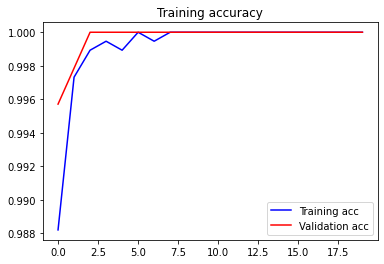

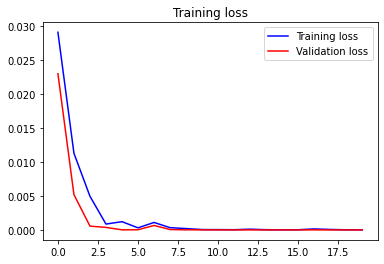

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Testing Performance**

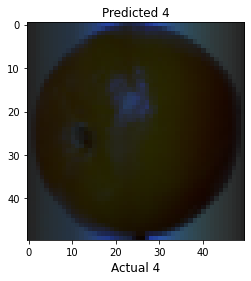

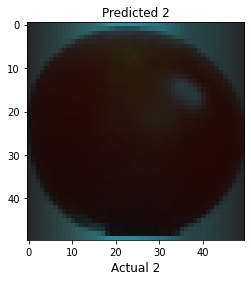

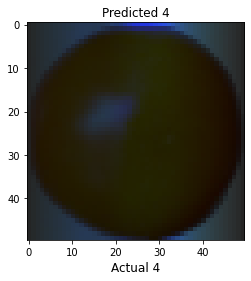

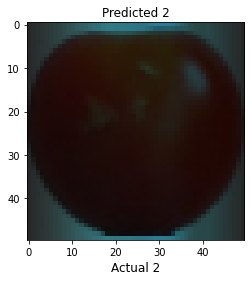

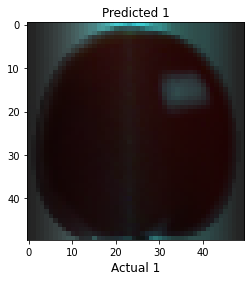

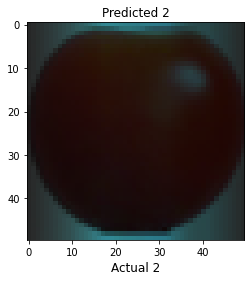

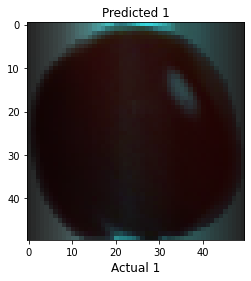

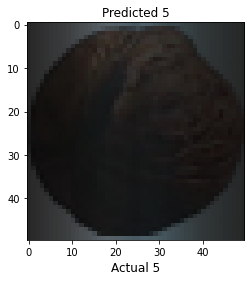

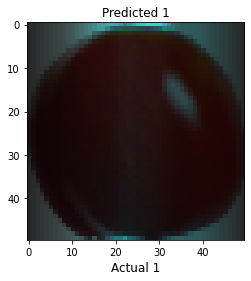

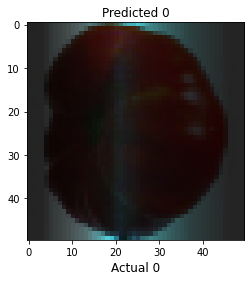

In [15]:
predict = model1.predict(x_test)

# Used for checking the accuracy of the model

for i in range(0,10):
  plt.title("Predicted {}".format(np.argmax(predict[i], axis=-1)))
  plt.xlabel("Actual {}".format(np.argmax(y_test[i], axis=-1)), fontsize=12)
  plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE, 3))
  plt.show()

**Testing Directory**

In [16]:
TESTDIR = "/content/drive/My Drive/Colab Notebooks/fruits-test"

**Creating Testing Data**

In [17]:
testing_data = []
IMG_SIZE = 50
def create_testing_data():
      for img in os.listdir(TESTDIR):
          try:
              img_array2 = cv2.imread(os.path.join(TESTDIR,img), cv2.IMREAD_UNCHANGED)
              img_rgb2 = cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
              new_array2 = cv2.resize(img_rgb2, (IMG_SIZE, IMG_SIZE))
              testing_data.append(new_array2)
          except Exception as e:
              pass

create_testing_data()
print(len(testing_data))


579


In [18]:
X1 = np.array(testing_data).reshape(-1, IMG_SIZE, IMG_SIZE,3)
X1 = normalize(X1, axis=1)

**Testing model on the final testing data**

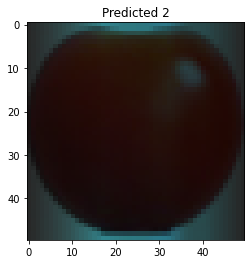

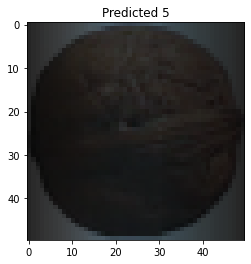

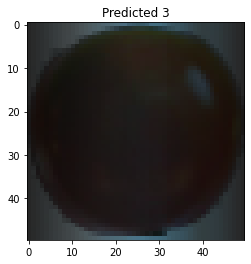

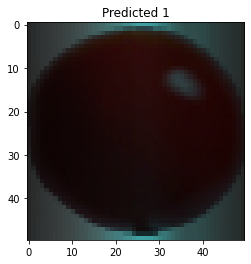

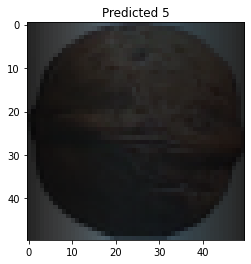

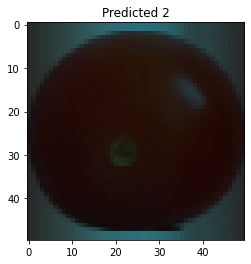

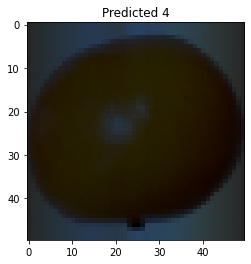

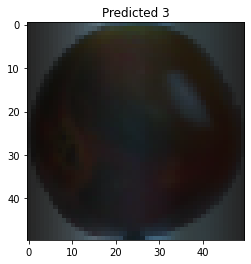

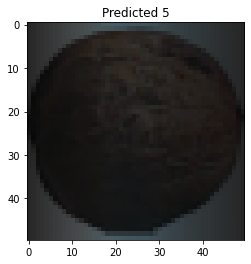

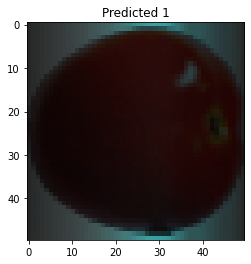

In [19]:
predict1 = model1.predict(X1)

# Used for checking the accuracy of the model on the newly imported testing data

for i in range(0,10):
  plt.title("Predicted {}".format(np.argmax(predict1[i], axis=-1)))
  plt.imshow(X1[i].reshape(IMG_SIZE, IMG_SIZE, 3))
  plt.show()